In [1]:
import os
import shutil
from imgaug import augmenters as iaa
import PIL
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import ipyplot

In [2]:
# 在使用时需要pip如下包
# pip install imgaug
# pip install ipyplot

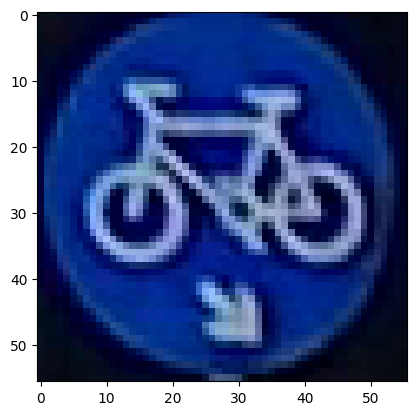

In [3]:
# 实验用图
image = imageio.imread(r"C:\Users\mark\Documents\classifier_tt100k_2021\classifier_tt100k_2021\i2r\1_0_288.png")
plt.imshow(image)
plt.show()

In [4]:
# 第一项为原图
blur_list = [iaa.GaussianBlur(0, 0), iaa.GaussianBlur(0.25,3), iaa.GaussianBlur(0.5,10)]


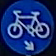
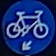


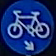
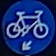

In [5]:
# 翻转数据增强
hflip= iaa.Fliplr(p=1.0)
image_aug= hflip.augment_image(image)
images = [image, image_aug]
labels = ["Original", "reverse"]
# plt.imshow(images_aug)
# plt.show()
ipyplot.plot_images(images, labels, img_width = 300)

c:\Users\mark\AppData\Local\Programs\Python\Python310\lib\site-packages\imgaug\augmenters\base.py:27: SuspiciousMultiImageShapeWarning: You provided a numpy array of shape (56, 56, 3) as a multi-image augmentation input, which was interpreted as (N, H, W). The last dimension however has value 1 or 3, which indicates that you provided a single image with shape (H, W, C) instead. If that is the case, you should use e.g. augmenter(image=<your input>) or augment_image(<your input>) -- note the singular 'image' instead of 'imageS'. Otherwise your single input image will be interpreted as multiple images of shape (H, W) during augmentation.
  ia.warn(



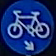
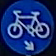
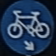


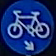
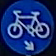
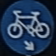

In [6]:
seq = iaa.Sequential([
    iaa.GaussianBlur(0,0)  # 在模型上使用0均值1方差进行高斯模糊
])
image_aug = seq.augment_images(image)  # 应用数据增强
seq2 = iaa.Sequential([         
    iaa.GaussianBlur(0.7,1000)  # 在模型上使用0均值1方差进行高斯模糊
])
image_aug2 = seq2.augment_images(image)
images = [image, image_aug, image_aug2]
labels = ["Original", "GaussianBlur", "GaussianBlur2"]
ipyplot.plot_images(images,labels,img_width = 300)

In [7]:
# 第一项为原图
noise_list = [iaa.AdditiveGaussianNoise(0, 0), iaa.AdditiveGaussianNoise(3, 5), iaa.AdditiveGaussianNoise(5, 10), iaa.AdditiveGaussianNoise(5, 20)]


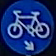
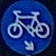
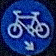
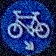


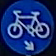
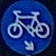
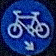
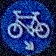

In [8]:
noise = iaa.AdditiveGaussianNoise(3, 5)  # 参数值：正态分布(均值, 方差）
image_aug = noise.augment_image(image)
noise2 = iaa.AdditiveGaussianNoise(5, 10)
image_aug2 = noise2.augment_image(image)
noise3 = iaa.AdditiveGaussianNoise(5, 20)
image_aug3 = noise3.augment_image(image)

images = [image, image_aug, image_aug2, image_aug3]
labels = ["Original", "GaussianBlur", "GaussianBlur2", "GaussianBlur3"]
ipyplot.plot_images(images, labels, img_width = 300)

In [9]:
# 第一项为原图
elastic_list = [iaa.ElasticTransformation(0,0), iaa.ElasticTransformation(10), iaa.ElasticTransformation(54,20)]


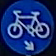
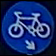


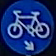
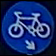

In [10]:
noise = iaa.ElasticTransformation(50, 20)# 强度，平滑度
image_aug= noise.augment_image(image)
images = [image, image_aug]
labels = ["Original", "Elastic"]
ipyplot.plot_images(images, labels, img_width = 300)

In [11]:
# 第一个是原图
contrast_list = [iaa.GammaContrast((1.0, 1.0)), 
                 iaa.GammaContrast((2.0, 2.0)), 
                 iaa.SigmoidContrast(gain=(10, 10), cutoff=(0.6, 0.6)), 
                 iaa.LinearContrast((0.8, 0.8)), 
                 iaa.LinearContrast((0.4, 0.4)), 
                 iaa.LinearContrast((2, 2)), 
                 iaa.GammaContrast((0.6, 0.6))
                ]


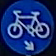
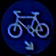
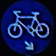
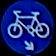


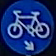
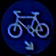
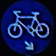
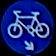

In [12]:
contrast=iaa.GammaContrast((1.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(2, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((1, 2))
input_contrast = contrast.augment_image(image)
sigmoid_contrast = contrast_sig.augment_image(image)
linear_contrast = contrast_lin.augment_image(image)

images_list=[image, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=300)


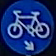
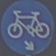


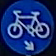
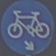

In [20]:
# someof函数
zzz = iaa.SomeOf(1, contrast_list)
seq = iaa.Sequential([
    zzz,
    iaa.GaussianBlur(0,0)  # 在模型上使用0均值1方差进行高斯模糊
])
image_aug = seq.augment_image(image)
images = [image, image_aug]
labels = ["Original", "reverse"]
# plt.imshow(images_aug)
# plt.show()
ipyplot.plot_images(images, labels, img_width = 300)

In [22]:
# 批量数据生成
for noise in range(len(noise_list)):
    for blur in range(len(blur_list)):
        for contrast in range(len(contrast_list)):
#             for elastic in range(len(elastic_list)):
            seq = iaa.Sequential([
                noise_list[noise],
                blur_list[blur],
                contrast_list[contrast]
#                 elastic_list[elastic]
            ])
            img_aug = seq.augment_images(image)
            imageio.imwrite( r"C:\Users\mark\Pictures\test\tb_{}_{}_{}.png".format(noise, blur, contrast),img_aug)
                

In [54]:
noise = iaa.AdditiveGaussianNoise(10, 40)
images_aug = noise.augment_image(images)

TypeError: %d format: a real number is required, not str

In [17]:
type(images_aug)

numpy.ndarray

TypeError: Invalid shape (9, 56, 56, 3) for image data

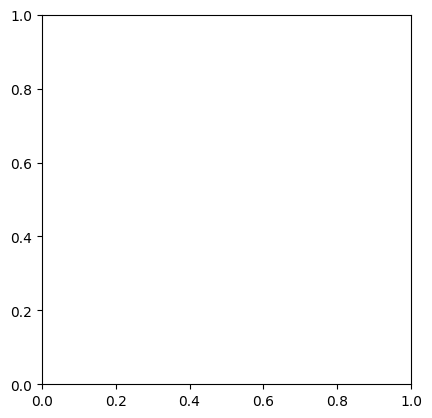

In [16]:

plt.imshow(images_aug)
plt.show()

In [183]:
imageio.imwrite( r"C:\Users\mark\Pictures\test\test1.png",image)